<a href="https://colab.research.google.com/github/convin305/sum-tudy/blob/master/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A008%2C09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter8
## 8-1

패딩  
:  입력 배열의 주위를 가상의 원소로 채우는 것, 실제 값은 0으로 채워져있어 계산에는 영향을 미치지 않는다.  
중앙부와 모서리 픽셀이 합성곱에 참여하는 비율을 동일하게 하기 위해서 시행한다.  
* 세임 패딩 : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것 (일반적으로 쓰임, padding = 'same')  
입력과 만들어진 특성맵의 가로세로 크기가 같다는 특징이 있다.  
* 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우 => 특성 맵의 크기가 줄어든다. (padding = 'valid' / default)  
* stride : 오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 조정, 기본 1, 잘 바꾸지 않음.  

풀링  
: 합성곱 층에서 만든 특성 맵의 가로 세로 크기를 줄이는 역할 수행. 특성맵의 개수  축소 X  
* 최대풀링(max pooling) / 평균풀링(average pooling)



## 8-2

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
train_scaled.shape

(48000, 28, 28, 1)

train_scaled 의 차원이 하나 추가된 것을 볼 수 있다.  
____  
합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()

#첫번째 합성곱 층(필터 32개, RELU와 세임패딩 사용)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(28,28,1)))
#피쳐맵 크기를 절반으로 줄이기
model.add(keras.layers.MaxPooling2D(2))

#두번째 합성곱 층(필터 64개)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

#flatten - hidden dense layer - dropout - output dense layer 순서
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               313700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

첫번째 합성곱 층 통과하면서 피쳐맵의 깊이는 32가 되고, 이후 두번째 층을 통과하면서 64가 되었다. (필터개수)  
동시에 height, width는 풀링을 통과하면서 절반으로 준 것을 볼 수 있다.  
파라미터 개수 계산 : 커널사이즈 * 커널사이즈 * 깊이 * 필터개수 + 필터개수  

---

층의 구성을 그림으로 표현해보기

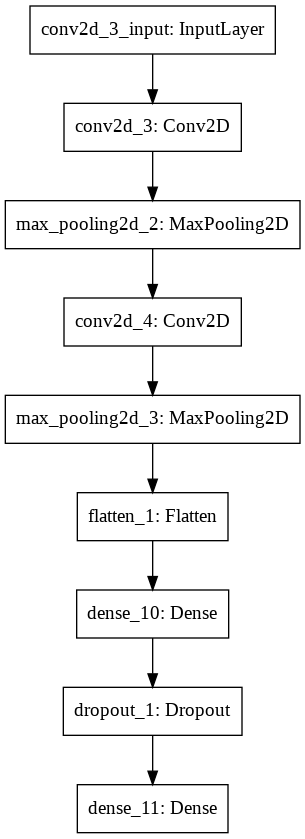

In [ ]:
keras.utils.plot_model(model)

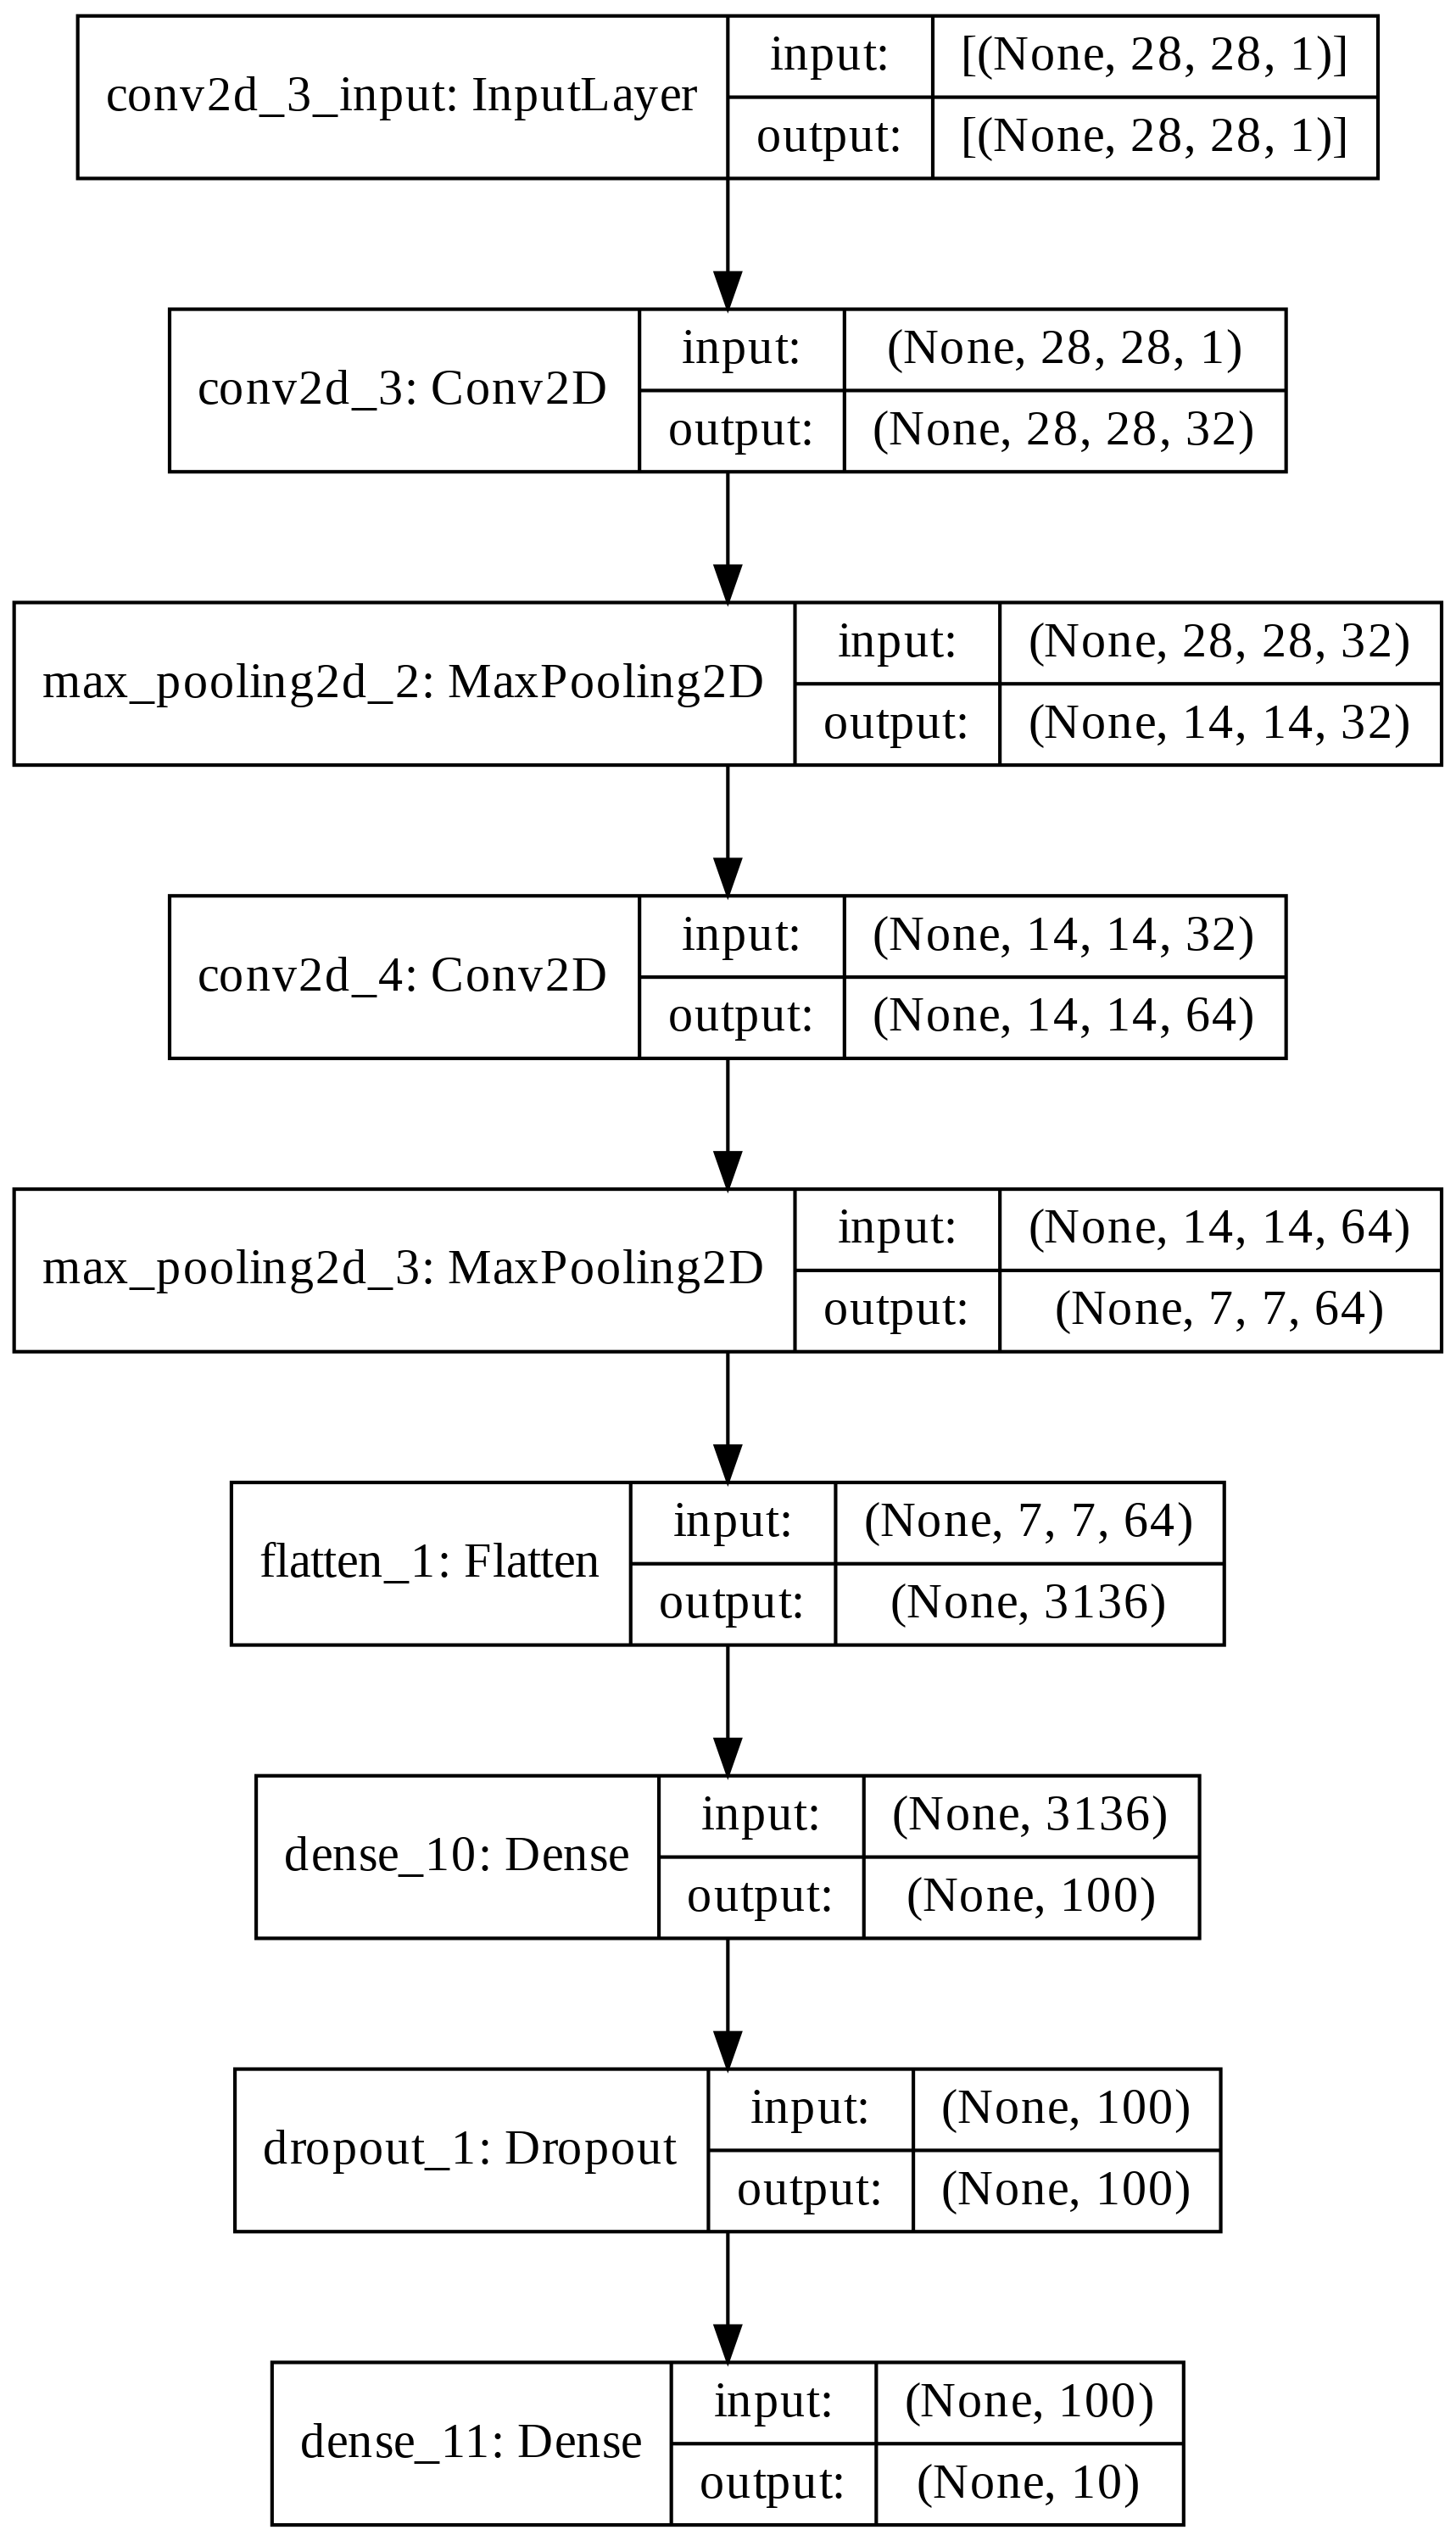

In [ ]:
#show_shapes : 입,출력의 크기 표시 / to_file : 파일로 저장 / dpi : 해상도 지정
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

모델 컴파일과 훈련  
=> ADAM 옵티마이저, ModelCheckpoint 콜백, Earlystopping 콜백 사용

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.7465 - accuracy: 0.7285 - val_loss: 0.3435 - val_accuracy: 0.8709
Epoch 2/20
1500/1500 [==============================] - 55s 36ms/step - loss: 0.3712 - accuracy: 0.8668 - val_loss: 0.2837 - val_accuracy: 0.8938
Epoch 3/20
1500/1500 [==============================] - 55s 36ms/step - loss: 0.3125 - accuracy: 0.8874 - val_loss: 0.2612 - val_accuracy: 0.9032
Epoch 4/20
1500/1500 [==============================] - 55s 36ms/step - loss: 0.2824 - accuracy: 0.8991 - val_loss: 0.2458 - val_accuracy: 0.9070
Epoch 5/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2541 - accuracy: 0.9067 - val_loss: 0.2395 - val_accuracy: 0.9097
Epoch 6/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2350 - accuracy: 0.9129 - val_loss: 0.2366 - val_accuracy: 0.9103
Epoch 7/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2160 - accuracy: 0.9208 - val_loss: 0.2312 -

손실그래프

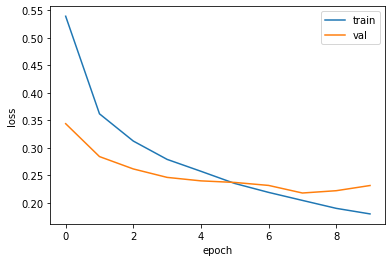

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

성능 평가

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 10ms/step - loss: 0.2174 - accuracy: 0.9212


[0.21741941571235657, 0.9211666584014893]

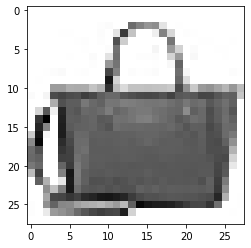

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

슬라이싱을 사용하는 이유 : 슬라이싱은 인덱싱과 다르게 전체 차원을 유지하며 전달한다.   
=> 케라스의 fit, predict, evaluate 등은 모두 입력의 첫번째 차원이 배치사이즈 일 것으로 예상하기 때문에 이미지가 하나인 경우 1이 꼭 살아있어야 한다.   
하지만 인덱싱 사용 시 배치가 하나일 경우 1이 사라짐  
**인덱싱 사용 시 : (28,28,1)  
슬라이싱 사용 시 : (1,28,28,1)**  


In [ ]:
preds = model.predict(val_scaled[0:1])
#예측 확률 출력(높을수록 주장하는 클래스가 됨)
print(preds)

[[1.2359733e-19 7.6846176e-27 6.5175574e-24 9.3726308e-21 7.7132201e-20
  2.7139857e-20 3.5545367e-19 8.4215218e-23 1.0000000e+00 8.5018818e-26]]


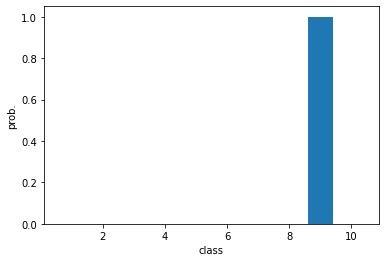

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np

In [ ]:
print(classes[np.argmax(preds)])

가방


예상 성능 테스트

In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.2457 - accuracy: 0.9127


[0.2456917017698288, 0.9126999974250793]

## 8-3

가중치 시각화

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
#케라스에 추가된 층은 layers 속성에 저장되어 있음 
model.layers

첫번째 합성곱 층의 가중치  
weights의 첫번째 원소 : 가중치 / 두번째 원소 : 절편의 개수

In [ ]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
#다루기 쉽도록 넘파이로 변환
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.022590347 0.25652894


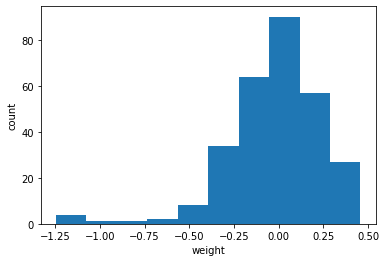

In [ ]:
#히스토그램으로 시각화, 가중치를 1차원 배열로 변환 필요

plt.hist(conv_weights.reshape(-1, 1)) 
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

밝은 부분의 값이 높다.  

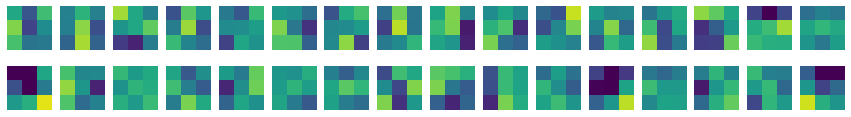

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

훈련하지 않은 빈 합성곱 신경망을 만들기

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

#첫번째 층의 가중치를 저장
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.00017772366 0.08203526


가중치들을 시각화 해보면, 이전에 비해서 균등한 가중치인 것을 확연하게 볼 수 있음

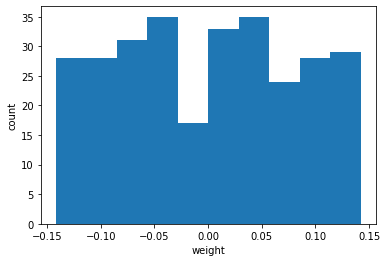

In [ ]:
#히스토그램 시각화 : 가중치를 초기화시에는 균등분포에서 랜덤하게 선택하기 때문에 비교적 균등
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

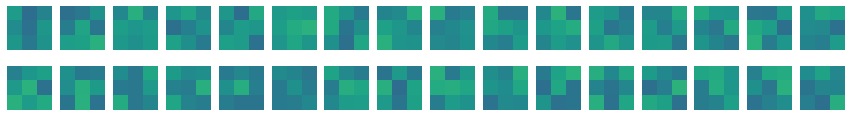

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

**함수형 API**  
: 입력과 출력이 여러개 등 복잡한 모델의 경우 사용함.  
케라스의 model 클래스를 사용해서 모델을 만든다.  

[오타확인](https://www.hanbit.co.kr/media/books/book_view.html?p_code=B2002963743)

In [ ]:
'''dense1 = keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')

inputs = keras.Input(shape=(784,))

#sequential 객체의 add매서드에 전달하는 대신 함수처럼 호출 가능
hidden = dense1(inputs)

#두번째 층 호출
outputs = dense2(hidden)

#inputs, outputs를 model클래스로 연결
model = keras.Model(inputs, outputs)'''



"dense1 = keras.layers.Dense(100,activation='sigmoid')\ndense2 = keras.layers.Dense(10,activation='softmax')\n\ninputs = keras.Input(shape=(784,))\n\n#sequential 객체의 add매서드에 전달하는 대신 함수처럼 호출 가능\nhidden = dense1(inputs)\n\n#두번째 층 호출\noutputs = dense2(hidden)\n\n#inputs, outputs를 model클래스로 연결\nmodel = keras.Model(inputs, outputs)"

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

특성 맵 시각화

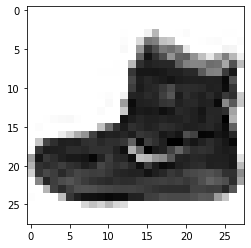

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

#첫번째 샘플
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

Conv2D층이 만드는 특성 맵 출력

In [ ]:
#predict()를 위해 첫번째 배치를 1로 만들어줘야 한다. 

inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


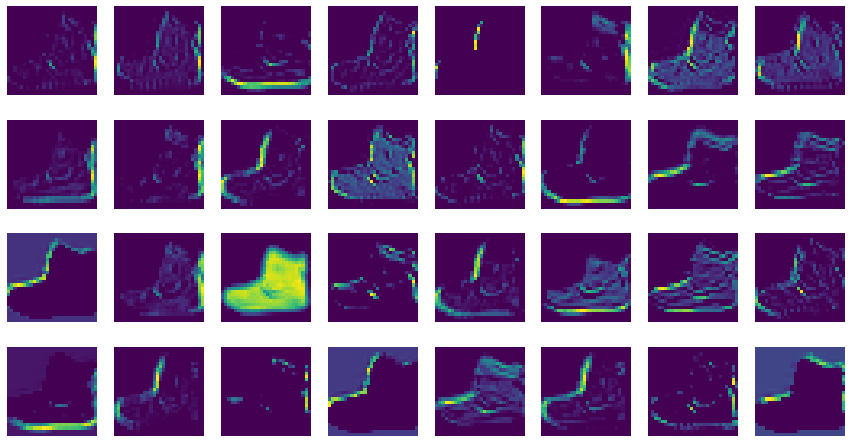

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
#두번째 합성곱이 만든 특성맵
conv2_acti = keras.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)

(1, 14, 14, 64)


뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습함.

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

#Chapter 9
## 9-2

IMDB : 영화 리뷰를 긍정과 부정으로 분류해놓은 데이터셋

In [ ]:
 from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

print(train_input.shape, test_input.shape)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
#첫번째 리뷰의 길이(단위 : 토큰)
print(len(train_input[0]))

218


In [ ]:
#두번째 리뷰의 길이(단위 : 토큰) -> 리뷰별로 길이가 다름을 알 수 있음
print(len(train_input[1]))

189


첫번째 리뷰에 담긴 내용  
: 이미로 정수로 변환이 되어 있다.  어휘사전(500개)에 담기지 않은 단어들은 2로 표현되어 있음

In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


타깃 데이터 출력  
이진 분류 - 0(부정), 1(긍정)

In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


검증 세트 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

import numpy as np

lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


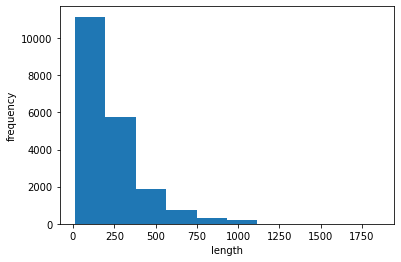

In [ ]:
#length배열을 히스토그램으로 시각화 
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

pad_sequences  
: 시퀀스 데이터의 길이를 맞추어 준다.  
maxlen보다 긴 시퀀스의 앞부분을 자른다. 보통 뒷정보가 더 유용하다고 판단하기 때문.  
truncating매개변수를 post로 바꾸면 뒷부분을 자를 수 있음

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

print(train_seq.shape) #shape가 (20000,100)으로 맞추어준다.

(20000, 100)


In [ ]:
#train_seq의 첫번째 샘플
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

순환신경망 만들기

In [ ]:
from tensorflow import keras

model = keras.Sequential()

#dense나 conv2d를 사용하지 않고, simpleRNN 사용
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#원핫인코딩
train_oh = keras.utils.to_categorical(train_seq)

print(train_oh.shape)

(20000, 100, 500)


In [ ]:
#첫번째 샘플의 첫번째 토큰의 인코딩 확인
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
#val_seq의 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
#모델 구조 출력
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


순환 신경망 훈련

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 34ms/step - loss: 0.7030 - accuracy: 0.4997 - val_loss: 0.6990 - val_accuracy: 0.4994
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6972 - accuracy: 0.5105 - val_loss: 0.6964 - val_accuracy: 0.5018
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6943 - accuracy: 0.5211 - val_loss: 0.6946 - val_accuracy: 0.5072
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6924 - accuracy: 0.5264 - val_loss: 0.6931 - val_accuracy: 0.5118
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6905 - accuracy: 0.5275 - val_loss: 0.6919 - val_accuracy: 0.5172
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6886 - accuracy: 0.5406 - val_loss: 0.6910 - val_accuracy: 0.5264
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6863 - accuracy: 0.5419 - val_loss: 0.6901 - val_ac

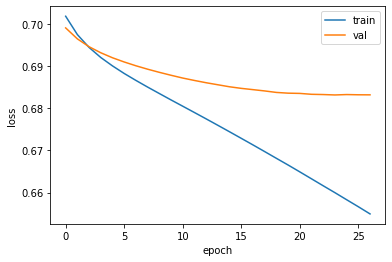

In [ ]:
#훈련손실과 검증손실을 그래프로 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#원핫인코딩후 입력 데이터 크기 비교
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


단어 임베딩  
: 각 단어를 고정된 크기의 실수 벡터로 바꾸어준다.  
원핫인코딩된 벡터보다 의미있는 값으로 채워져 더 좋은 성능을 낸다.  
장점 - 입력으로 정수 데이터를 받아 메모리를 효율적으로 사용이 가능하다(train_seq 사용 가능)

In [ ]:
model2 = keras.Sequential()

#500 - 어휘 사전의 크기, 16 - 임베딩 벡터의 크기, 100 - 입력 시퀀스의 길이,train_seq의 길이를 100로 설정했기 때문
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 19ms/step - loss: 0.6978 - accuracy: 0.5068 - val_loss: 0.6837 - val_accuracy: 0.5742
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6777 - accuracy: 0.5855 - val_loss: 0.6626 - val_accuracy: 0.6354
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6525 - accuracy: 0.6523 - val_loss: 0.6350 - val_accuracy: 0.6816
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6215 - accuracy: 0.7007 - val_loss: 0.6062 - val_accuracy: 0.7216
Epoch 5/100
313/313 [==============================] - 5s 18ms/step - loss: 0.5925 - accuracy: 0.7366 - val_loss: 0.5874 - val_accuracy: 0.7368
Epoch 6/100
313/313 [==============================] - 5s 18ms/step - loss: 0.5741 - accuracy: 0.7516 - val_loss: 0.5721 - val_accuracy: 0.7410
Epoch 7/100
313/313 [==============================] - 5s 18ms/step - loss: 0.5553 - accuracy: 0.7612 - val_loss: 0.5532 - val_accuracy:

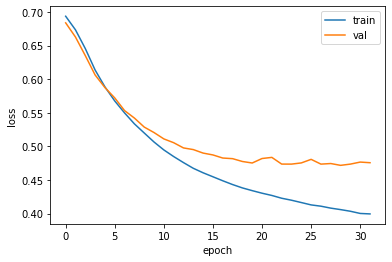

In [ ]:
#훈련손실과 검증손실을 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 9-3
LSTM : long short-term memory, 단긱기억을 오래 기억하기 위해 고안됨  
**LSTM 신경망 훈련하기**

In [ ]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

#샘플 길이를 100으로 맞추고, 부족시 패딩 추가
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

NameError: ignored

In [ ]:
#순환층 만들기
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

NameError: ignored

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
#훈련손실과 검증손실을 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#드롭아웃 적용 - dropout:셀의 입력에 드롭아웃을 적용 / recurrent_dropout:순환되는 은닉상태에 드롭아웃 적용(GPU사용 불가)
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
#훈련손실과 검증손실을 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

2개의 층을 연결  
: return_sequences = True

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

In [ ]:
#훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
#훈련손실과 검증손실을 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

GRU신경망  

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

GPU는 은닉 상태에 곱해지는 절편이 별도로 필요해서 추가적으로 파라미터가 더해진다.

In [ ]:
#훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
#훈련손실과 검증손실을 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

가장 좋았던 2개의 순환층을 쌓은 모델을 로드하여 테스트 세트에 대한 성능 확인하기

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)